In [1]:
import pandas as pd
from google.colab import drive
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SENG 474/Assignment1/spambase_augmented.csv'
df = pd.read_csv(file_path)

In [4]:
print(df.head())

   0.000  0.640  0.640.1  0.000.1  0.320  0.000.2  0.000.3  0.000.4  0.000.5  \
0   0.21   0.28     0.50      0.0   0.14     0.28     0.21     0.07     0.00   
1   0.06   0.00     0.71      0.0   1.23     0.19     0.19     0.12     0.64   
2   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
3   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
4   0.00   0.00     0.00      0.0   1.85     0.00     0.00     1.85     0.00   

   0.000.6  ...  0.000.816  0.000.817  0.000.818  0.000.819  0.000.820  \
0     0.94  ...       0.00        0.0        0.0       0.00       0.00   
1     0.25  ...       0.06        0.0        0.0       0.12       0.06   
2     0.63  ...       0.00        0.0        0.0       0.00       0.00   
3     0.63  ...       0.00        0.0        0.0       0.00       0.00   
4     0.00  ...       0.00        0.0        0.0       0.00       0.00   

   0.000.821  0.000.822  0.000.823  0.000.824  1  
0       0.00       0.00

In [5]:
x = df.iloc[:,:-1] #features
y = df.iloc[:,-1] #label/last col

In [6]:
print(x.shape)
print(y.shape)

(4600, 1185)
(4600,)


In [7]:
f_num = 10
test_size = 0.3
train_size = 1-test_size

print(f"NUMBER OF FORESTS is {f_num} TEST SIZE is {test_size*4600} train_size is {train_size*4600} training batch size is {4600 * train_size / f_num}")

NUMBER OF FORESTS is 10 TEST SIZE is 1380.0 train_size is 3220.0 training batch size is 322.0


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

In [9]:
rf = RandomForestClassifier(criterion="gini", random_state=42)

In [10]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
print(rf.score(x_test, y_test))

0.9376811594202898


In [12]:
#change depth, training size, max features maybe too(ie sqrt d(1186) and higher and lower)

In [13]:
#depth
depth_dict = {"TreeDepth":[],"TrainLoss":[],"TestLoss":[]}
for i in range(1,20):

  rf = RandomForestClassifier(criterion = "entropy",n_estimators=100, max_depth=i, random_state=42)
  rf.fit(x_train, y_train)
  depth_dict["TreeDepth"].append(i)
  depth_dict["TrainLoss"].append(1-(rf.score(x_train, y_train)))
  depth_dict["TestLoss"].append(1-(rf.score(x_test, y_test)))

In [14]:
print(depth_dict)

{'TreeDepth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'TrainLoss': [0.13136645962732918, 0.0984472049689441, 0.09316770186335399, 0.07950310559006213, 0.0680124223602484, 0.060559006211180155, 0.047515527950310554, 0.040062111801242195, 0.03105590062111796, 0.027639751552795078, 0.0183229813664596, 0.01552795031055898, 0.013354037267080732, 0.011490683229813614, 0.009937888198757738, 0.008385093167701863, 0.005279503105590111, 0.004347826086956497, 0.0034161490683229934], 'TestLoss': [0.14927536231884053, 0.11884057971014494, 0.11014492753623184, 0.10217391304347823, 0.10217391304347823, 0.09855072463768111, 0.08985507246376812, 0.0818840579710145, 0.07826086956521738, 0.07536231884057976, 0.07028985507246377, 0.06739130434782614, 0.06521739130434778, 0.0644927536231884, 0.06521739130434778, 0.05797101449275366, 0.05869565217391304, 0.05869565217391304, 0.06014492753623191]}


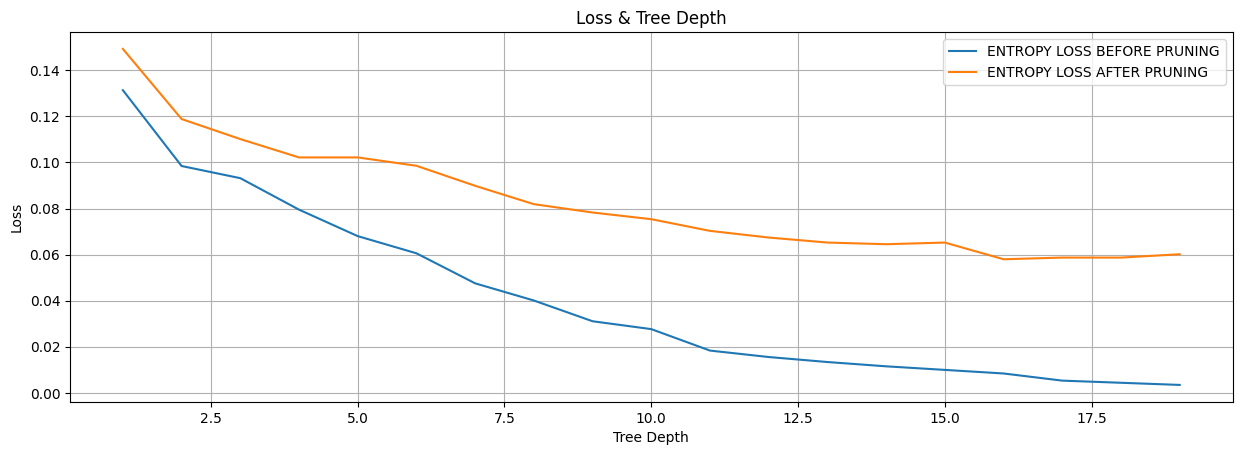

In [28]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Tree Depth")
plt.ylabel("Loss")
plt.title("Loss & Tree Depth")

x_values = depth_dict['TreeDepth']

plt.plot(x_values, depth_dict['TrainLoss'], label="ENTROPY LOSS BEFORE PRUNING")
plt.plot(x_values, depth_dict['TestLoss'], label="ENTROPY LOSS AFTER PRUNING")

plt.legend()
plt.show()

In [16]:
print(x_train.shape)

(3220, 1185)


In [17]:
#train size
train_size_dict = {"Train_Size":[],"TrainLoss":[],"TestLoss":[]}
train_size_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for size in train_size_list:
  temp_xtrain = x_train.sample(frac=size)
  temp_ytrain = y_train.sample(frac=size)

  rf = RandomForestClassifier(criterion = "entropy", n_estimators=100, max_depth=3, random_state=42)
  rf.fit(temp_xtrain, temp_ytrain)

  #should I be using total xtrain or temp xtrain err

  train_size_dict["Train_Size"].append(size)
  train_size_dict["TrainLoss"].append(1-(rf.score(temp_xtrain, temp_ytrain)))
  train_size_dict["TestLoss"].append(1-(rf.score(x_test, y_test)))

In [18]:
print(train_size_dict)

{'Train_Size': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'TrainLoss': [0.27329192546583847, 0.3338509316770186, 0.33747412008281574, 0.38586956521739135, 0.38819875776397517, 0.3840579710144928, 0.38553682342502216, 0.37810559006211175, 0.3806073153899241, 0.3816770186335404], 'TestLoss': [0.4007246376811594, 0.42971014492753623, 0.40724637681159426, 0.4173913043478261, 0.4217391304347826, 0.42101449275362324, 0.4144927536231884, 0.41956521739130437, 0.4181159420289855, 0.4181159420289855]}


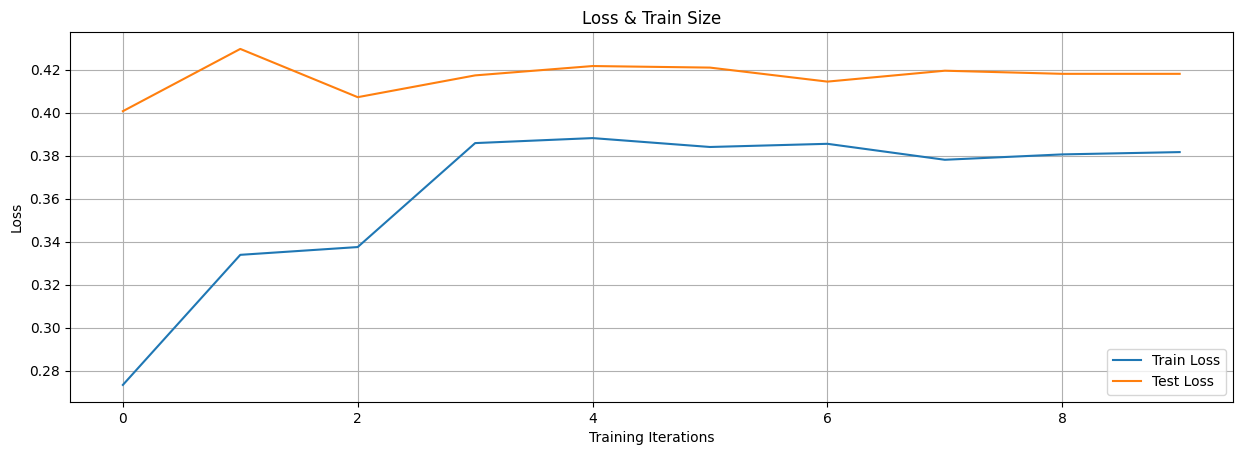

In [29]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Training Iterations")
plt.ylabel("Loss")
plt.title("Loss & Train Size")

x_values = range(len(train_size_dict['Train_Size']))

plt.plot(x_values, train_size_dict['TrainLoss'], label="Train Loss")
plt.plot(x_values, train_size_dict['TestLoss'], label="Test Loss")

plt.legend()
plt.show()

In [20]:
#max features through splitting
max_features_dict = {"FeatureNumber":[],"TrainLoss":[],"TestLoss":[]}

#sqrt of 1186 ~ 34
#log2(1186) ~ 10
#have to change this due to max features taking str input

feature_list = [1,10, 15, 34, 68, 112, 224, 448, 996, 1185]

for feature_num in feature_list:
  rf = RandomForestClassifier(criterion = "entropy", n_estimators=100, max_depth=3, max_features=feature_num, random_state=42)
  rf.fit(x_train, y_train)
  max_features_dict["FeatureNumber"].append(feature_num)
  max_features_dict["TrainLoss"].append(1-(rf.score(x_train, y_train)))
  max_features_dict["TestLoss"].append(1-(rf.score(x_test, y_test)))

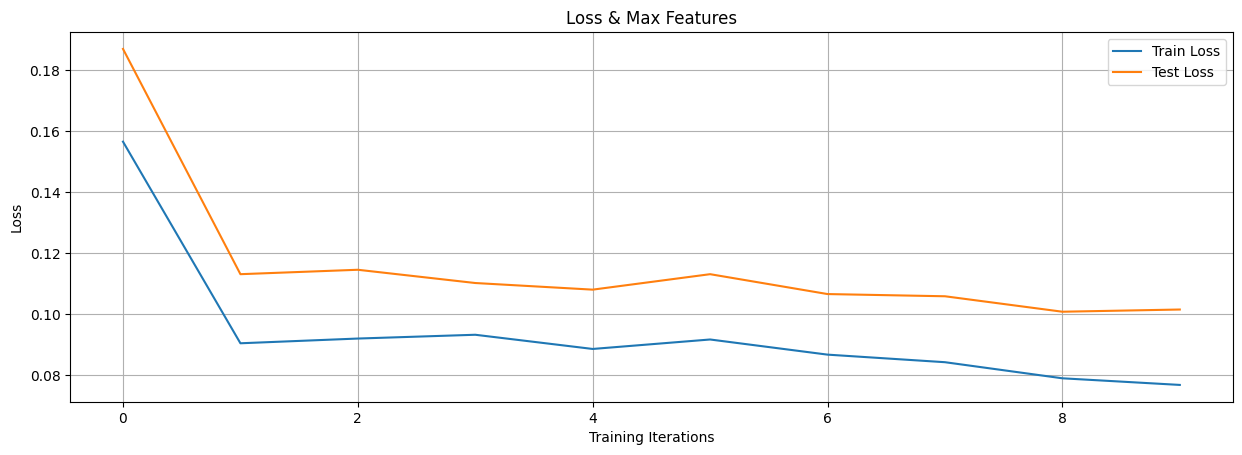

In [31]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Training Iterations")
plt.ylabel("Loss")
plt.title("Loss & Max Features")

x_values = range(len(max_features_dict['FeatureNumber']))

plt.plot(x_values, max_features_dict['TrainLoss'], label="Train Loss")
plt.plot(x_values, max_features_dict['TestLoss'], label="Test Loss")

plt.legend()
plt.show()

In [22]:
entropy_dict = {"Trait":[],"TrainLoss":[],"TestLoss":[]}
gini_dict = {"Trait":[],"TrainLoss":[],"TestLoss":[]}

rf_entropy = RandomForestClassifier(criterion = "entropy", n_estimators=100, max_depth=10, random_state=42)
rf_gini = RandomForestClassifier(criterion = "gini", n_estimators=100, max_depth=10, random_state=42)
rf_entropy.fit(x_train, y_train)
rf_gini.fit(x_train, y_train)

entropy_dict["Trait"].append("Default")
entropy_dict["TrainLoss"].append(1-(rf_entropy.score(x_train,y_train)))
entropy_dict["TestLoss"].append(1-(rf_entropy.score(x_test,y_test)))

gini_dict["Trait"].append("Default")
gini_dict["TrainLoss"].append(1-(rf_gini.score(x_train,y_train)))
gini_dict["TestLoss"].append(1-(rf_gini.score(x_test,y_test)))


rf_entropy = RandomForestClassifier(criterion = "entropy", n_estimators=50, max_depth=10, random_state=42)
rf_gini = RandomForestClassifier(criterion = "gini", n_estimators=50, max_depth=10, random_state=42)
rf_entropy.fit(x_train, y_train)
rf_gini.fit(x_train, y_train)

entropy_dict["Trait"].append("n_estimators")
entropy_dict["TrainLoss"].append(1-(rf_entropy.score(x_train,y_train)))
entropy_dict["TestLoss"].append(1-(rf_entropy.score(x_test,y_test)))

gini_dict["Trait"].append("n_estimators")
gini_dict["TrainLoss"].append(1-(rf_gini.score(x_train,y_train)))
gini_dict["TestLoss"].append(1-(rf_gini.score(x_test,y_test)))

rf_entropy = RandomForestClassifier(criterion = "entropy", n_estimators=100, max_depth=20, random_state=42)
rf_gini = RandomForestClassifier(criterion = "gini", n_estimators=100, max_depth=20, random_state=42)
rf_entropy.fit(x_train, y_train)
rf_gini.fit(x_train, y_train)

entropy_dict["Trait"].append("max_depth")
entropy_dict["TrainLoss"].append(1-(rf_entropy.score(x_train,y_train)))
entropy_dict["TestLoss"].append(1-(rf_entropy.score(x_test,y_test)))

gini_dict["Trait"].append("max_depth")
gini_dict["TrainLoss"].append(1-(rf_gini.score(x_train,y_train)))
gini_dict["TestLoss"].append(1-(rf_gini.score(x_test,y_test)))

rf_entropy = RandomForestClassifier(criterion = "entropy", n_estimators=100, max_depth=10, max_features="sqrt", random_state=42)
rf_gini = RandomForestClassifier(criterion = "gini", n_estimators=100, max_depth=10, max_features="sqrt",random_state=42)
rf_entropy.fit(x_train, y_train)
rf_gini.fit(x_train, y_train)

entropy_dict["Trait"].append("max_features")
entropy_dict["TrainLoss"].append(1-(rf_entropy.score(x_train,y_train)))
entropy_dict["TestLoss"].append(1-(rf_entropy.score(x_test,y_test)))

gini_dict["Trait"].append("max_features")
gini_dict["TrainLoss"].append(1-(rf_gini.score(x_train,y_train)))
gini_dict["TestLoss"].append(1-(rf_gini.score(x_test,y_test)))

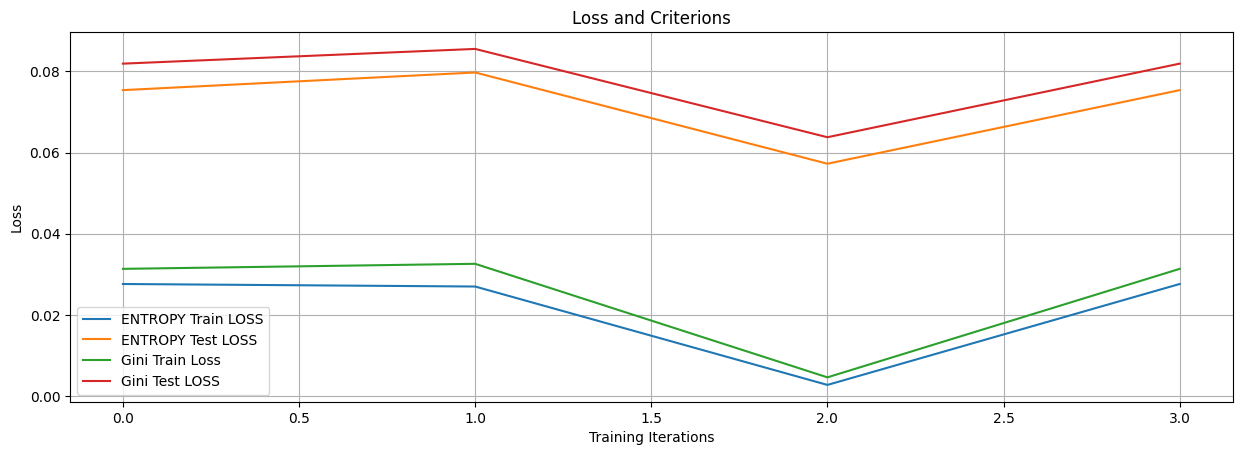

In [32]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Training Iterations")
plt.ylabel("Loss")
plt.title("Loss and Criterions")

x_values = range(len(entropy_dict['Trait']))

plt.plot(x_values,entropy_dict['TrainLoss'], label="ENTROPY Train LOSS")
plt.plot(x_values, entropy_dict['TestLoss'], label="ENTROPY Test LOSS")
plt.plot(x_values, gini_dict['TrainLoss'], label="Gini Train Loss")
plt.plot(x_values, gini_dict['TestLoss'], label="Gini Test LOSS ")

plt.legend()
plt.show()

In [24]:
for i in range(0,4):
  print(f"DIFFERENCE IS GINI - ENTROPY: {gini_dict['TestLoss'][i] - entropy_dict['TestLoss'][i]}")

DIFFERENCE IS GINI - ENTROPY: 0.006521739130434745
DIFFERENCE IS GINI - ENTROPY: 0.005797101449275366
DIFFERENCE IS GINI - ENTROPY: 0.006521739130434856
DIFFERENCE IS GINI - ENTROPY: 0.006521739130434745


In [25]:
'''
----------------------------------
IDEAL RANDOM FOREST CLASSIFIER ISH
----------------------------------
'''

depth_min_loss = (100,0)
train_min_loss = (100,0)
max_features_min_loss = (100,0)


for val in depth_dict["TestLoss"]:
  if val < depth_min_loss[0]:
    depth_min_loss = (val, depth_dict["TestLoss"].index(val))

for val in train_size_dict["TestLoss"]:
  if val < train_min_loss[0]:
    train_min_loss = (val, train_size_dict["TestLoss"].index(val))

for val in max_features_dict["TestLoss"]:
  if val < max_features_min_loss[0]:
    max_features_min_loss = (val, max_features_dict["TestLoss"].index(val))

print(max_features_dict)
print(train_min_loss)
print(depth_min_loss)
print(max_features_min_loss)

{'FeatureNumber': [1, 10, 15, 34, 68, 112, 224, 448, 996, 1185], 'TrainLoss': [0.15652173913043477, 0.09037267080745337, 0.09192546583850936, 0.09316770186335399, 0.08850931677018636, 0.09161490683229812, 0.08664596273291925, 0.08416149068322987, 0.07888198757763976, 0.07670807453416151], 'TestLoss': [0.18695652173913047, 0.11304347826086958, 0.11449275362318845, 0.11014492753623184, 0.10797101449275359, 0.11304347826086958, 0.10652173913043483, 0.10579710144927534, 0.10072463768115947, 0.10144927536231885]}
(0.4007246376811594, 0)
(0.05797101449275366, 15)
(0.10072463768115947, 8)


THEREFORE GINI IS SUPERIOR IN ALL ASPECTS

ideal params are gini, max features = 996, train set = 0.6, depth of 16

In [26]:
rf_ideal = RandomForestClassifier(criterion = "gini", n_estimators=100, max_depth=16, max_features=996, random_state=42)
rf_ideal.fit(x_train, y_train)
print(f"ideal train loss is {1-(rf_ideal.score(x_train,y_train))}")
print(f"ideal test loss is {1-(rf_ideal.score(x_test,y_test))}")
print(rf_ideal.score(x_test,y_test))

ideal train loss is 0.004347826086956497
ideal test loss is 0.05652173913043479
0.9434782608695652
